In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_excel('myexcel.xlsx')
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [69]:
np.random.seed(0)  
# Sets a random seed for reproducibility
# This ensures the random numbers are the same each time the code is run

data['Height'] = np.random.randint(150, 181, size=len(data))  
# Replaces each value in the "Height" column with a random integer between 150 and 180
# "size=len(data)" ensures there are as many random values as there are rows in the dataset

data.head()  
# Displays the first five rows to verify that the "Height" column has been replaced

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,162,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,165,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,171,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,150,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,153,231,Kentucky,5.000000e+06


In [43]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [47]:
mode_college = data['College'].mode()[0]
mode_college

'Kentucky'

In [49]:
data['College'] = data['College'].fillna(mode_college)
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College      0
Salary      11
dtype: int64

In [57]:
mean_salary = data['Salary'].mean()
data['Salary'] = data['Salary'].fillna(mean_salary)
mean_salary

4833969.545861297

In [59]:
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [63]:
data.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.580000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.163335e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.100150e+06
50%,13.000000,26.000000,220.000000,2.862190e+06
75%,25.000000,30.000000,240.000000,6.323553e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [71]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,162,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,165,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,171,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,150,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,153,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,176,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,169,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,157,256,Kentucky,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,158,231,Kansas,9.472760e+05


In [75]:
#checking duplicate rows
duplicates = data.duplicated().sum()
duplicates

0

In [83]:
print(data.dtypes)

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height        int32
Weight        int64
College      object
Salary      float64
dtype: object


In [85]:
# Check for unrealistic values
print(data['Age'] < 0)
print(data['Height'] < 0) 
print(data['Weight'] < 0)

0      False
1      False
2      False
3      False
4      False
       ...  
453    False
454    False
455    False
456    False
457    False
Name: Age, Length: 458, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
453    False
454    False
455    False
456    False
457    False
Name: Height, Length: 458, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
453    False
454    False
455    False
456    False
457    False
Name: Weight, Length: 458, dtype: bool


#1. Determine the distribution of employees across each team and 
calculate the percentage split relative to the total number of employees. 

In [89]:
team_count = data['Team'].value_counts()
team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [95]:
total_employees = len(data)
total_employees

458

In [115]:
team_percentage = (team_count/total_employees)*100
team_percentage = team_percentage.round(2).astype(str) + ' %'
print(team_percentage)

Team
New Orleans Pelicans      4.15 %
Memphis Grizzlies         3.93 %
Utah Jazz                 3.49 %
New York Knicks           3.49 %
Milwaukee Bucks           3.49 %
Brooklyn Nets             3.28 %
Portland Trail Blazers    3.28 %
Oklahoma City Thunder     3.28 %
Denver Nuggets            3.28 %
Washington Wizards        3.28 %
Miami Heat                3.28 %
Charlotte Hornets         3.28 %
Atlanta Hawks             3.28 %
San Antonio Spurs         3.28 %
Houston Rockets           3.28 %
Boston Celtics            3.28 %
Indiana Pacers            3.28 %
Detroit Pistons           3.28 %
Cleveland Cavaliers       3.28 %
Chicago Bulls             3.28 %
Sacramento Kings          3.28 %
Phoenix Suns              3.28 %
Los Angeles Lakers        3.28 %
Los Angeles Clippers      3.28 %
Golden State Warriors     3.28 %
Toronto Raptors           3.28 %
Philadelphia 76ers        3.28 %
Dallas Mavericks          3.28 %
Orlando Magic             3.06 %
Minnesota Timberwolves    3.06 %
Name:

In [133]:
distribution = pd.DataFrame ({
    'Team' : team_count.index,
    'Employee count':team_count.values,
    'Percentage' : team_percentage.values })
distribution

,Team,Employee count,Percentage
0,New Orleans Pelicans,19,4.15 %
1,Memphis Grizzlies,18,3.93 %
2,Utah Jazz,16,3.49 %
3,New York Knicks,16,3.49 %
4,Milwaukee Bucks,16,3.49 %
5,Brooklyn Nets,15,3.28 %
6,Portland Trail Blazers,15,3.28 %
7,Oklahoma City Thunder,15,3.28 %
8,Denver Nuggets,15,3.28 %
9,Washington Wizards,15,3.28 %


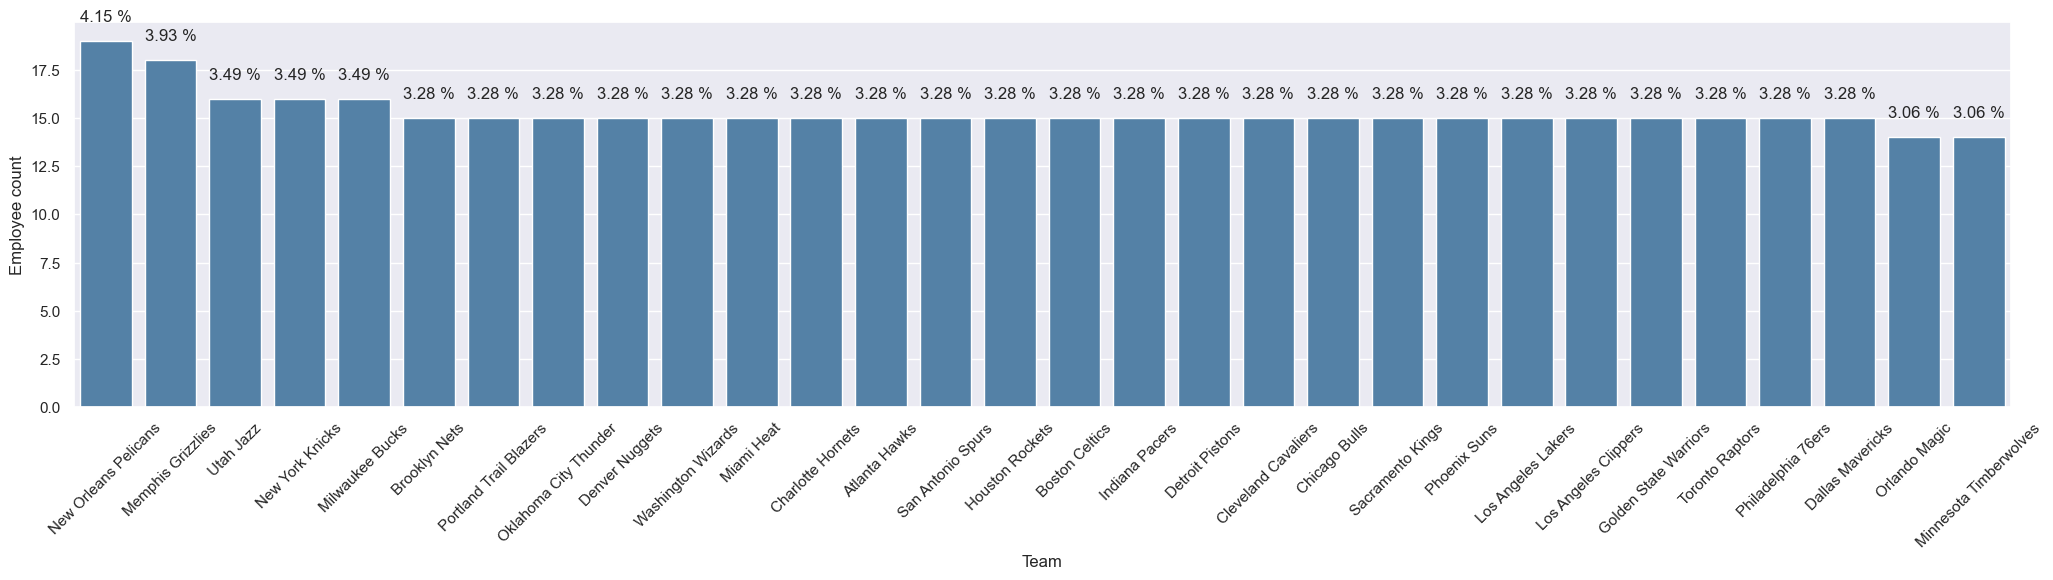

In [145]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.barplot(x = 'Team', y = 'Employee count' ,data = distribution , color ="steelblue")

plt.title=('Distribution of employees across teams')
plt.xlabel=('Teams')
plt.ylabel=('Percentage of employees (%)')

# Display the percentage values on top of each bar
for index, row in distribution.iterrows():
    plt.text(index, row['Employee count'] + 1, f"{row['Percentage']}", ha="center")

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

#2. Segregate employees based on their positions within the company

In [43]:
# Group by the 'Position' column to get the count of employees in each position
position_distribution = data.groupby('Position').size().reset_index(name='Employee Count')

# Calculate the percentage of each position relative to the total employees
position_distribution['Percentage'] = \
(position_distribution['Employee Count'] / position_distribution['Employee Count'].sum()) * 100

# Display the distribution
print(position_distribution)

  Position  Employee Count  Percentage
0        C              79   17.248908
1       PF             100   21.834061
2       PG              92   20.087336
3       SF              85   18.558952
4       SG             102   22.270742


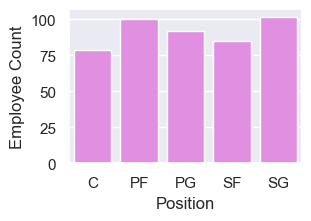

In [185]:
sns.set(style='darkgrid')
plt.figure(figsize=(3,2))
sns.barplot(x = 'Position', y = 'Employee Count' , data =position_distribution, color='violet')
plt.title=('Position distribution')

#3. Identify the predominant age group among employees. 

In [196]:
import pandas as pd

# Define age ranges and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]  # Define bins for age groups
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']  # Labels for each age group

# Create a new column for age groups in the DataFrame
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Count the number of employees in each age group
age_group_counts = data['Age Group'].value_counts()

# Identify the predominant age group
predominant_age_group = age_group_counts.idxmax()

# Display the results
print("Age group distribution:\n", age_group_counts)
print("\nThe predominant age group is:", predominant_age_group)


Age group distribution:
 Age Group
20-29    346
30-39     91
<20       21
40-49      0
50-59      0
60+        0
Name: count, dtype: int64

The predominant age group is: 20-29


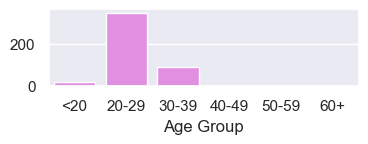

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and figure size
sns.set(style='darkgrid')
plt.figure(figsize=(4, 1))

# Plot the bar chart for age group distribution
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='violet')

plt.show()

#4. Discover which team and position have the highest salary expenditure. (2 marks)

In [15]:
team_exp = data.groupby('Team')['Salary'].sum()
team_exp

Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramento Kings           71683666.0
San Ant

In [17]:
team_high_exp = team_exp.idxma

'Cleveland Cavaliers'

In [231]:
highest_exp = team_exp.max()
highest_exp

111822658.5458613

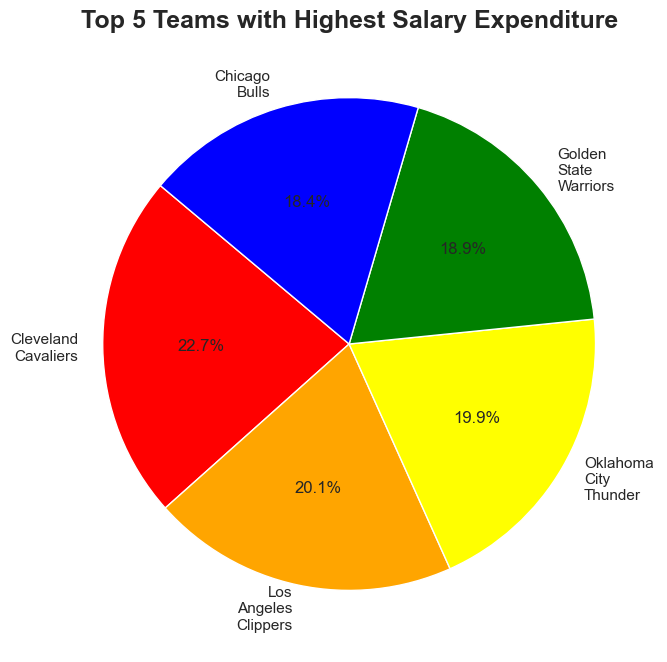

Team with highest salary expenditure: Cleveland Cavaliers with an amount of 106,988,689


In [49]:
import matplotlib.pyplot as plt

# Modify the team names to display in two lines for the pie chart
top_teams.index = [name.replace(" ", "\n") for name in top_teams.index]

# Plotting the pie chart for the top 5 teams with highest salary expenditure
plt.figure(figsize=(8, 8))
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, \
        colors=['red', 'orange', 'yellow', 'green', 'blue'])

# Add title with larger and bold font
plt.title('Top 5 Teams with Highest Salary Expenditure', fontsize=18, fontweight='bold')

# Display the pie chart
plt.show()

# Output the team with highest expenditure
print(f"Team with highest salary expenditure: {team_high_exp} with an amount of {highest_exp:,.0f}")


#5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

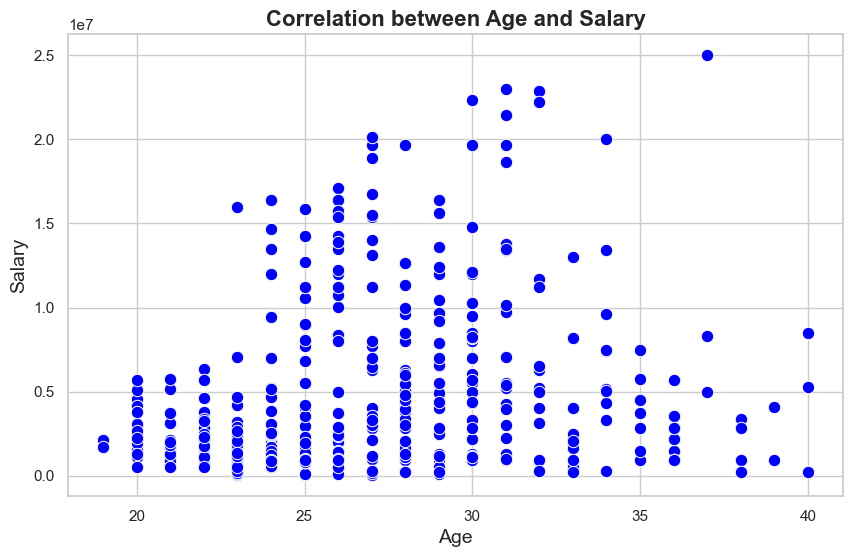

In [37]:
# Set the style for the plot to make it look consistent and clear
sns.set(style="whitegrid")

# Create a scatter plot to visualize age vs. salary relationship
plt.figure(figsize=(10, 6))  # Set the size of the plot to 10x6 inches

# Plot age on x-axis and salary on y-axis, using seaborn's scatterplot function
sns.scatterplot(x='Age', y='Salary', data=data, color='blue', edgecolor='w', s=80)

# Add a title and labels to the axes to make the plot clear
plt.title("Correlation between Age and Salary", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Salary", fontsize=14)

# Show the plot
plt.show()

In [39]:
# Calculate the correlation coefficient between age and salary
correlation = data['Age'].corr(data['Salary'])

# Display the correlation result
print(f"The correlation between Age and Salary is: {correlation}")


The correlation between Age and Salary is: 0.21400941226570985


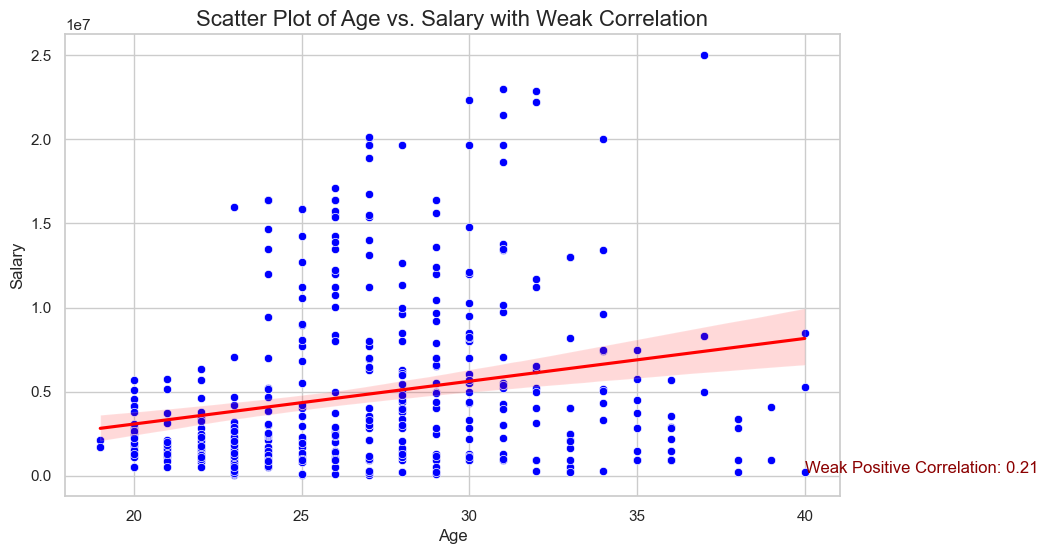

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data, color="blue")
sns.regplot(x='Age', y='Salary', data=data, scatter=False, color="red")  # Adds a trendline

# Add title and labels
plt.title("Scatter Plot of Age vs. Salary with Weak Correlation", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Salary", fontsize=12)

# Annotate with correlation interpretation
correlation = 0.21  # Substitute with your calculated correlation
plt.text(40, 150000, f"Weak Positive Correlation: {correlation:.2f}", fontsize=12, color="darkred")

plt.show()


The correlation coefficient of 0.21 suggests a weak positive correlation between age and salary. 
This means that, on average, salary tends to slightly increase with age, but the relationship is not strong.

Here's a quick interpretation:

Weak Positive Correlation: Since 0.21 is close to 0, it implies that while there may be a slight 
trend of salary increasing as age increases, 
it’s not a strong or consistent trend. Age and salary aren't closely related in this dataset.